# 1. Preparação do notebook

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

#2. Geração das séries temporais

## 2.1. Sem outliers

In [51]:
######################
##### Parâmetros #####
######################

n = 5943  # Número de passos (observações)
num_series = 10  # Número total de séries
np.random.seed(42)  # Para reprodutibilidade

############################
##### Séries Temporais #####
############################

# Definir a volatilidade crescente ao longo do tempo
volatility = np.linspace(1, 5, n)  # A volatilidade aumenta ao longo do tempo

# Gerar as séries com heterodecasticidade
series_dict = {
    f"bm_heteroscedasticity_{i+1}": np.cumsum(np.random.normal(0, volatility, n)) for i in range(num_series)
}

# Criar DataFrame
df = pd.DataFrame(series_dict)
df.head()

,bm_heteroscedasticity_1,bm_heteroscedasticity_2,bm_heteroscedasticity_3,bm_heteroscedasticity_4,bm_heteroscedasticity_5,bm_heteroscedasticity_6,bm_heteroscedasticity_7,bm_heteroscedasticity_8,bm_heteroscedasticity_9,bm_heteroscedasticity_10
0,0.496714,-1.544434,-0.120643,-0.160665,0.269824,-1.153504,-1.239162,1.178275,-2.678408,-0.496440
1,0.358357,-1.051218,-0.470764,-1.545975,0.577584,0.332652,-0.102988,0.852262,-1.671607,0.696883
2,1.006917,-0.216493,-0.651815,-1.754167,-0.181961,0.326851,0.237425,1.244022,-1.406661,0.361209
3,2.533023,-0.818833,-1.367922,-1.852257,0.878579,0.386145,-0.179616,0.559798,-1.583443,-0.212217
4,2.298239,0.350223,-1.728802,-3.088030,0.435163,-1.599820,-1.725778,0.879891,-3.254722,0.069842


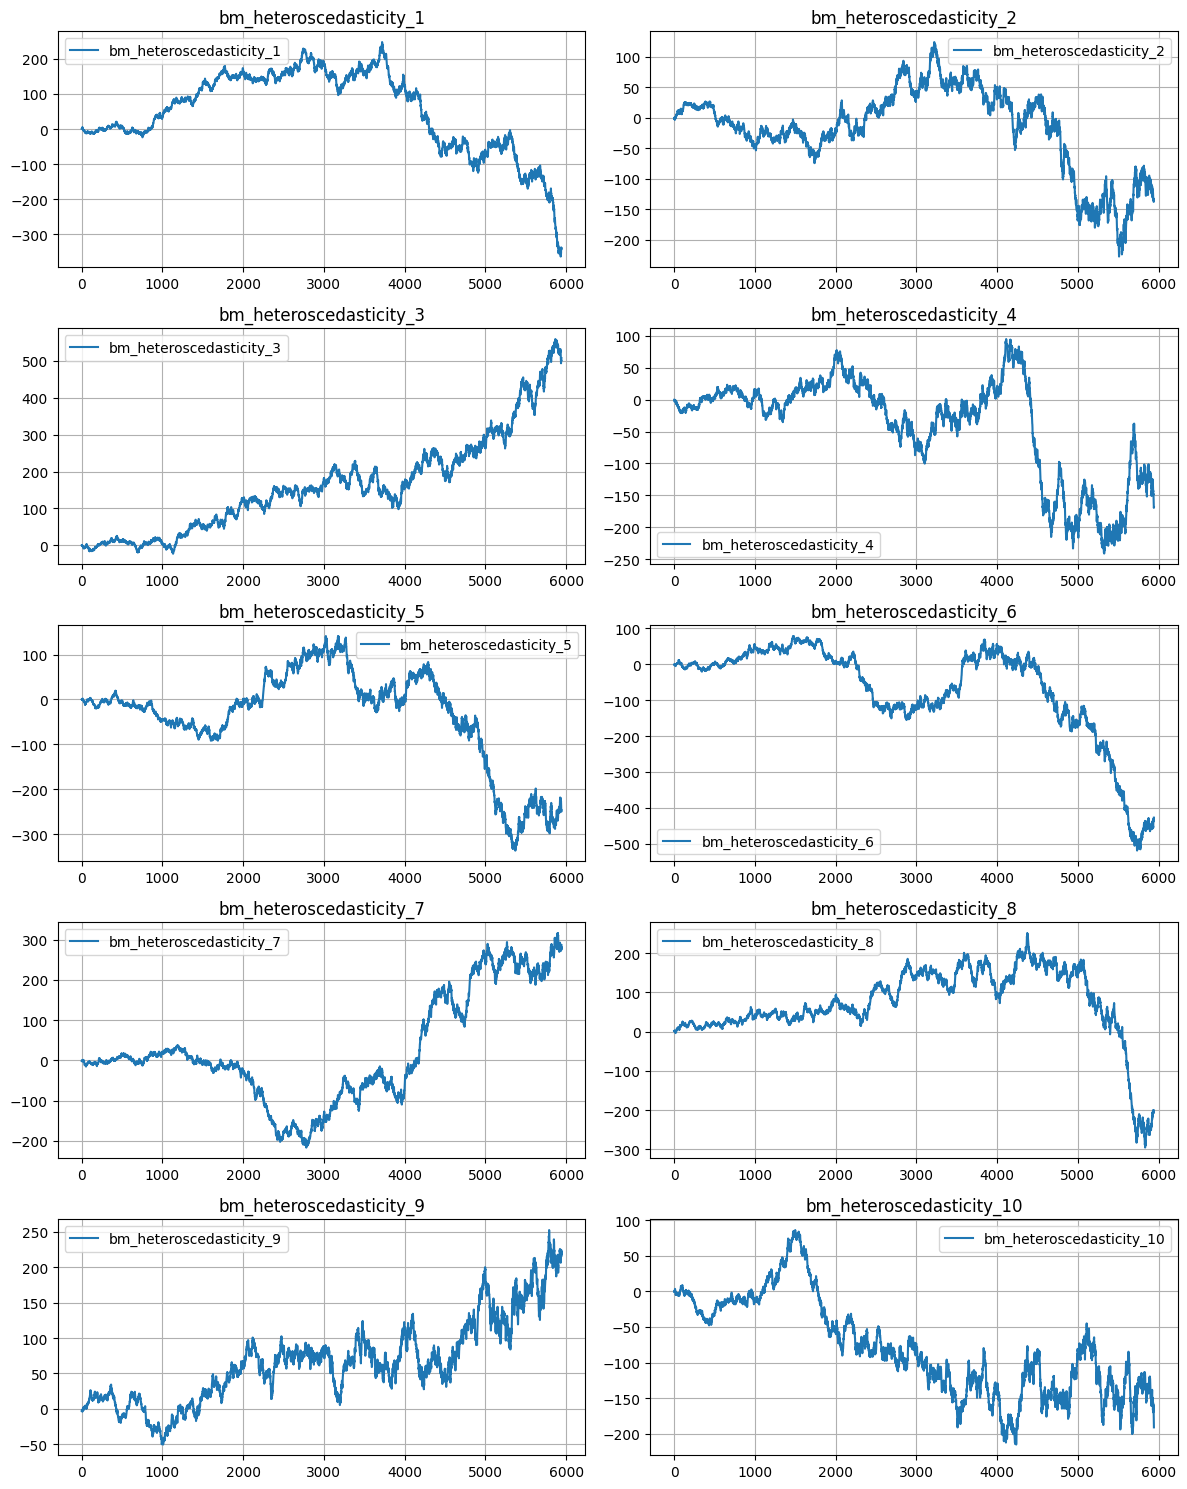

In [52]:
# Criar figura e subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

# Plotar cada série em um subplot
for i, col in enumerate(df.columns):
    axes[i].plot(df[col], label=col, linewidth=1.5)
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

In [53]:
################################
##### Detecção de outliers #####
################################

# Função para calcular o percentual de outliers usando o método IQR
def calcular_percentual_outliers(series):
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    outliers = (series < lim_inf) | (series > lim_sup)
    return np.mean(outliers) * 100

# Calcular o percentual de outliers para cada série
percentuais_outliers = {col: calcular_percentual_outliers(df[col]) for col in df.columns}

# Criar DataFrame com os resultados
df_detectOutliers = pd.DataFrame.from_dict(percentuais_outliers, orient='index', columns=['% Outliers']).round(2)
df_detectOutliers

,% Outliers
bm_heteroscedasticity_1,1.13
bm_heteroscedasticity_2,10.82
bm_heteroscedasticity_3,3.00
bm_heteroscedasticity_4,1.53
bm_heteroscedasticity_5,13.98
bm_heteroscedasticity_6,7.82
bm_heteroscedasticity_7,0.00
bm_heteroscedasticity_8,5.05
bm_heteroscedasticity_9,2.00
bm_heteroscedasticity_10,0.00


## 2.2. Com outliers

In [54]:
######################
##### Parâmetros #####
######################

n = 5943  # Número de passos (observações)
num_series = 10  # Número total de séries
np.random.seed(42)  # Para reprodutibilidade

############################
##### Séries Temporais #####
############################

# Definir a volatilidade crescente ao longo do tempo
volatility = np.linspace(1, 5, n)  # A volatilidade aumenta ao longo do tempo

# Gerar as séries com heterodecasticidade
series_dict = {
    f"bm_heteroscedasticity_{i+1}": np.cumsum(np.random.normal(0, volatility, n)) for i in range(num_series)
}

# Criar DataFrame
df = pd.DataFrame(series_dict)
df.head()

##############################
##### Adição de outliers #####
##############################

# Função para adicionar outliers em uma série
#def add_outliers(series, outlier_fraction=0.4):
#    n = len(series)
#    num_outliers = int(n * outlier_fraction)  # Total de outliers a serem inseridos

#    # Dividir os outliers igualmente entre os quartis
#    quartile_indices = np.array_split(np.random.permutation(n), 4)  # Divisão em quartis

    # Gerar valores de outliers (aumentando ou diminuindo em relação ao valor original)
#    for q_indices in quartile_indices:
#        num_q_outliers = len(q_indices) // 2  # Metade dos índices do quartil serão outliers
#        outlier_indices = np.random.choice(q_indices, num_q_outliers, replace=False)

        # Criar outliers aumentando ou diminuindo os valores em múltiplos do desvio padrão
#        std_dev = np.std(series)
#        series[outlier_indices] += np.random.choice([-1, 1], num_q_outliers) * np.random.uniform(3, 5) * std_dev

#    return series

def add_outliers(series, outlier_fraction=0.05):
    n = len(series)
    num_outliers = int(n * outlier_fraction)  # Definir a quantidade de outliers

    # Selecionar índices aleatórios para inserção dos outliers
    outlier_indices = np.random.choice(n, num_outliers, replace=False)

    # Gerar valores de outliers sem modificar drasticamente a estrutura
    std_dev = np.std(series)
    series[outlier_indices] += np.random.choice([-1, 1], num_outliers) * np.random.uniform(2, 4) * std_dev

    return series

# Aplicar a função de adição de outliers a cada série
df_outliers = df.apply(add_outliers, axis=0)
df_outliers.head()

,bm_heteroscedasticity_1,bm_heteroscedasticity_2,bm_heteroscedasticity_3,bm_heteroscedasticity_4,bm_heteroscedasticity_5,bm_heteroscedasticity_6,bm_heteroscedasticity_7,bm_heteroscedasticity_8,bm_heteroscedasticity_9,bm_heteroscedasticity_10
0,0.496714,-1.544434,-0.120643,-0.160665,0.269824,-1.153504,-1.239162,1.178275,-2.678408,-0.496440
1,0.358357,-1.051218,-0.470764,-1.545975,0.577584,-302.123778,-0.102988,0.852262,-1.671607,0.696883
2,1.006917,-0.216493,-0.651815,273.603212,-0.181961,0.326851,0.237425,191.234731,-1.406661,0.361209
3,2.533023,-0.818833,-1.367922,-1.852257,0.878579,0.386145,-0.179616,190.550507,-1.583443,-0.212217
4,2.298239,0.350223,-1.728802,-3.088030,0.435163,-1.599820,-1.725778,0.879891,-3.254722,0.069842


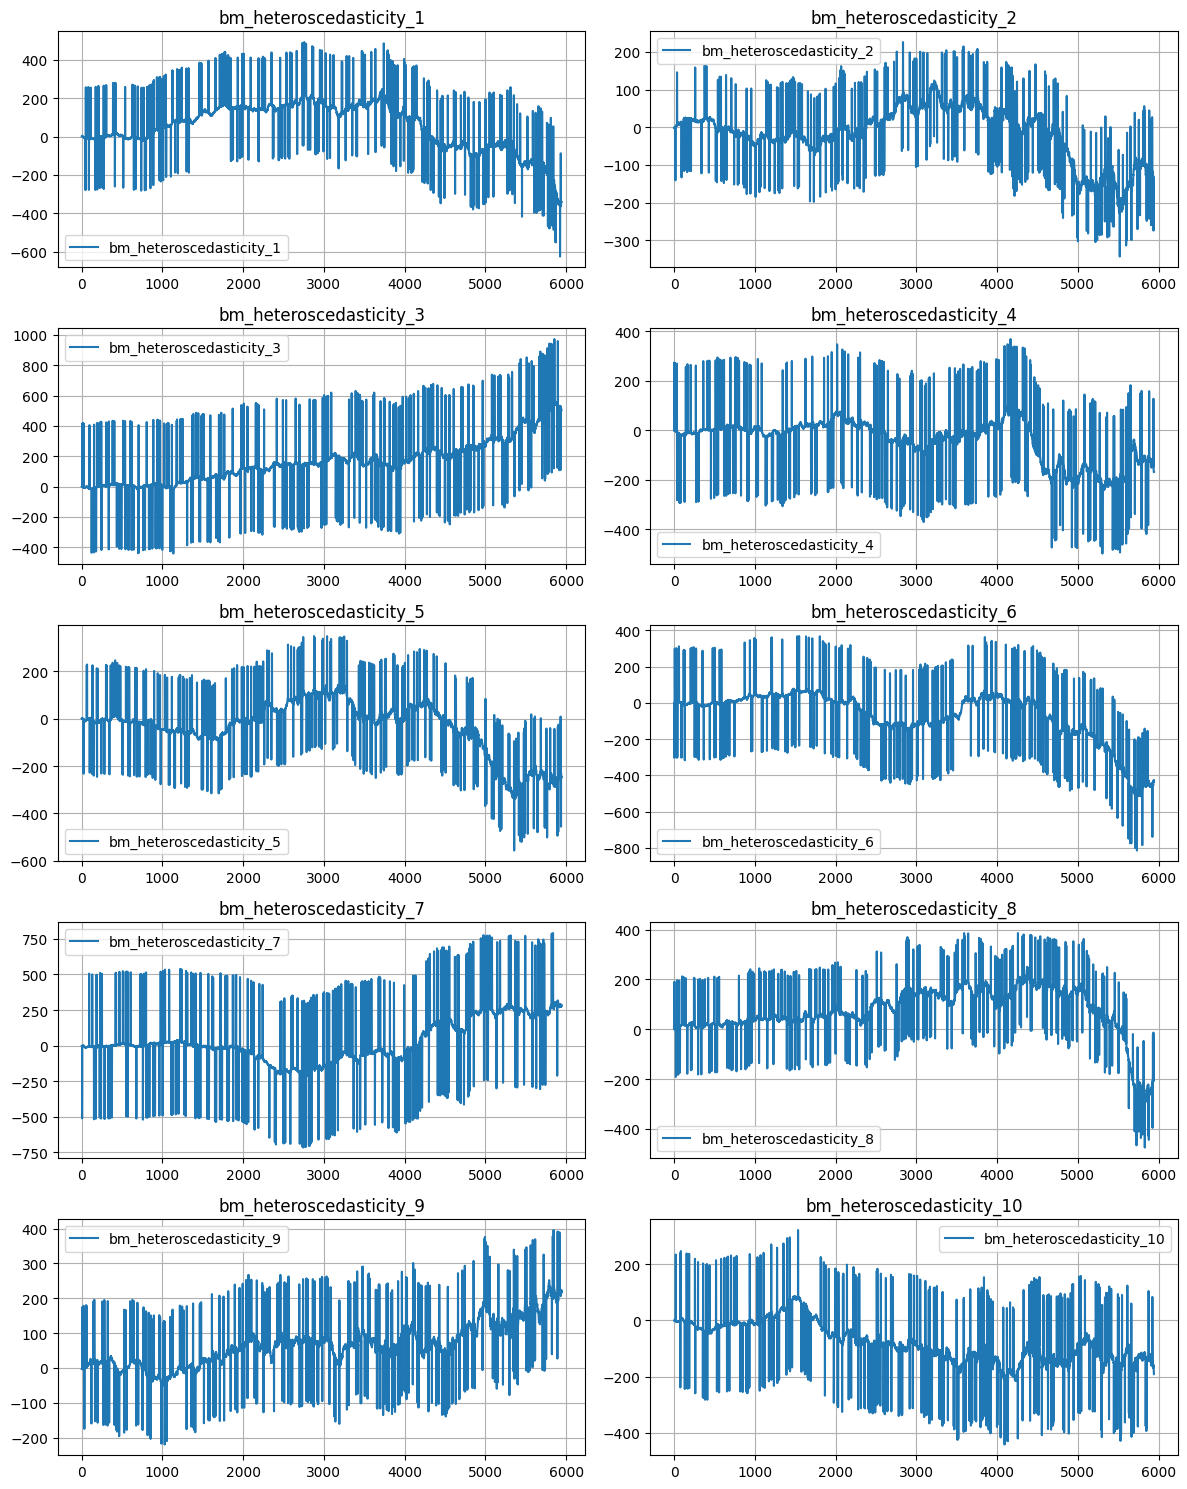

In [55]:
# Criar figura e subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

# Plotar cada série em um subplot
for i, col in enumerate(df.columns):
    axes[i].plot(df_outliers[col], label=col, linewidth=1.5)
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

In [56]:
################################
##### Detecção de outliers #####
################################

# Calcular o percentual de outliers para cada série
percentuais_outliers = {col: calcular_percentual_outliers(df_outliers[col]) for col in df_outliers.columns}

# Criar DataFrame com os resultados
df_detectOutliers = pd.DataFrame.from_dict(percentuais_outliers, orient='index', columns=['% Outliers']).round(2)
df_detectOutliers

,% Outliers
bm_heteroscedasticity_1,2.15
bm_heteroscedasticity_2,10.03
bm_heteroscedasticity_3,5.57
bm_heteroscedasticity_4,4.09
bm_heteroscedasticity_5,16.32
bm_heteroscedasticity_6,9.57
bm_heteroscedasticity_7,3.60
bm_heteroscedasticity_8,6.26
bm_heteroscedasticity_9,3.97
bm_heteroscedasticity_10,2.54


# 3. Exportação dos dados

In [57]:
# Envio do DataFrame para um arquivo Excel
file_path = '[BM Heterocedasticity] Geração de séries temporais.xlsx'
df.to_excel(file_path, index=False)
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>